In [1]:
from spiders import Z, W, X, Swap, FSwap, CZ, boxes
from discopy.quantum.zx import Id
from pyfile import eval, eq

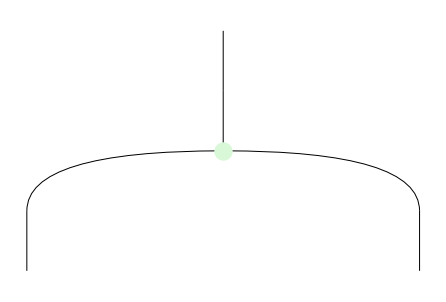

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [2]:
Z(1, 2).draw()
eval(Z(1, 2))

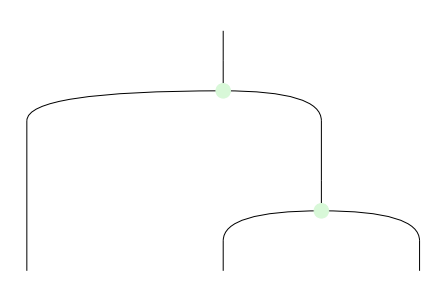

In [3]:
a = Z(1, 2) >> Z(1, 2) @ Id(1)
b = Z(1, 2) >> Id(1) @ Z(1, 2)
b.draw()

In [4]:
(eval(a) == eval(b)).all(), (eval(b) == eval(Z(1, 3))).all()

(True, True)

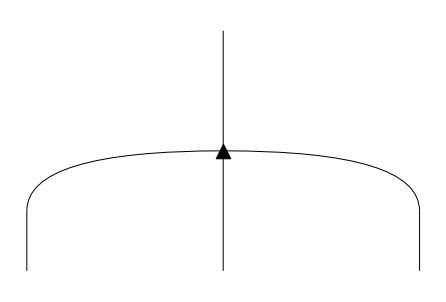

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [5]:

    
W(3).draw() 
eval(W(3))

## Rules

### W swaps

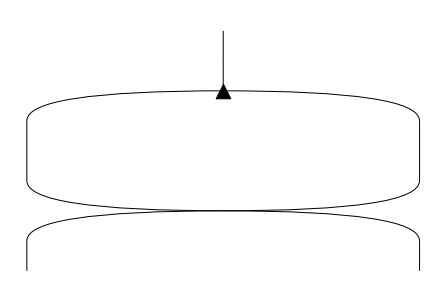

True

In [6]:
ws = W(2) >> Swap
ws.draw()
eq(W(), ws)

### W fusion

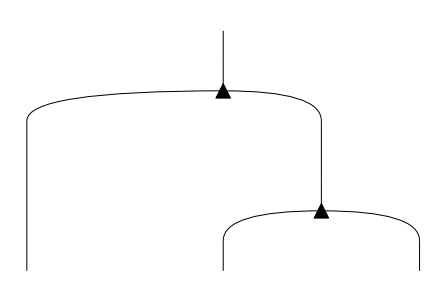

In [7]:
d = W(2) >> Id(1) @ W(2)
d.draw()

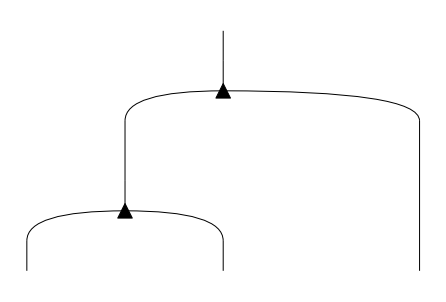

In [8]:
d2 = W(2) >> W(2) @ Id(1)
d2.draw()

In [9]:
eq(d, d2)

True

### bialgebra

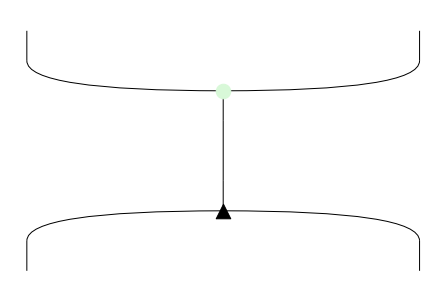

In [10]:
b1 = Z(2, 1) >> W(2)
b1.draw()

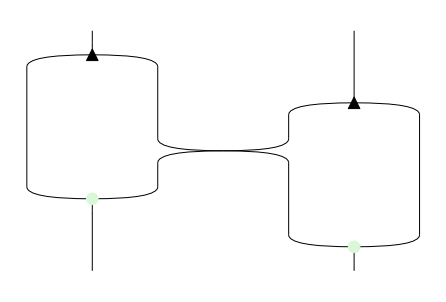

In [11]:
b2 = W(2) @ W(2) >> Id(1) @ Swap @ Id(1) >> Z(2, 1) @ Z(2, 1)
b2.draw()

In [12]:
eq(b1, b2)

True

### w algebra

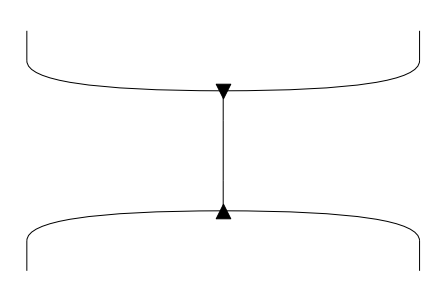

In [13]:
a1 = W(2).dagger() >> W(2)
a1.draw()

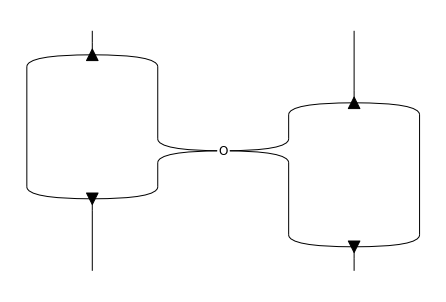

In [14]:
a2 = W(2) @ W(2) >> Id(1) @ FSwap @ Id(1) >> W(2, False) @ W(2, False)
a2.draw()

In [15]:
eq(a1, a2)

True

### Trialgebra

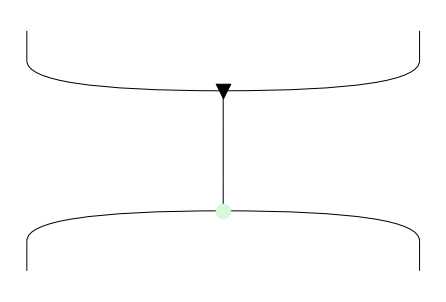

In [16]:
t1 = W().dagger() >> Z(1, 2)
t1.draw()

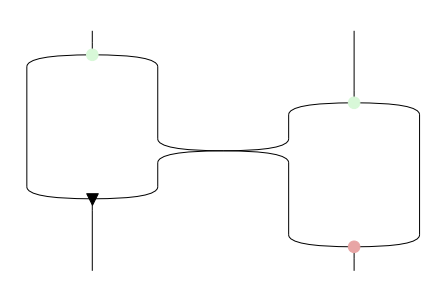

In [17]:
t2 = Z(1, 2) @ Z(1, 2) >> Id(1) @ Swap @ Id(1) >> W().dagger() @ X(2, 1)
t2.draw()

In [18]:
eq(t1, t2)

True

### $\Pi_{2,2}$

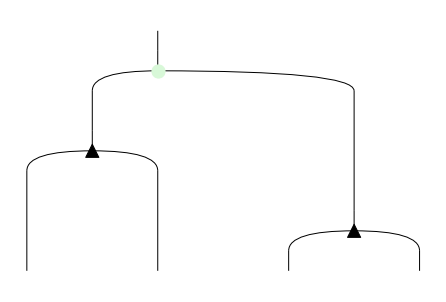

In [19]:
p = Z(1, 2) >> W(2) @ W(2)
p.draw()

In [20]:
def T(A, n):
    # return A^n
    if n == 1: return A
    return A @ T(A, n-1)


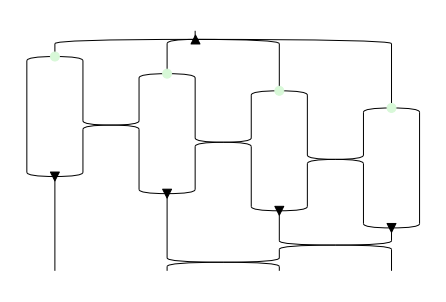

In [21]:
p2 = W(4) >> T(Z(1, 2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(W(2).dagger(), 4) >> Id(2) @ Swap >> Id(1) @ Swap @ Id(1)
p2.draw()

In [22]:
eq(p, p2)

True

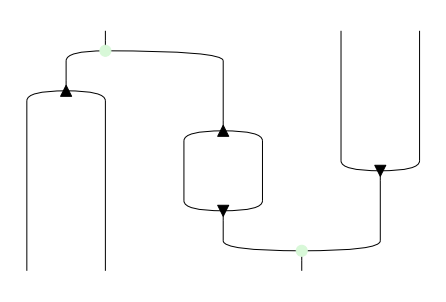

/tmp/ipykernel_8397/3288794954.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(pp).astype(float)


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
pp = p @ Id(2) >> Id(2) @ p.dagger() 
pp.draw()
eval(pp).astype(float)

### $\Sigma_{2, 2}$

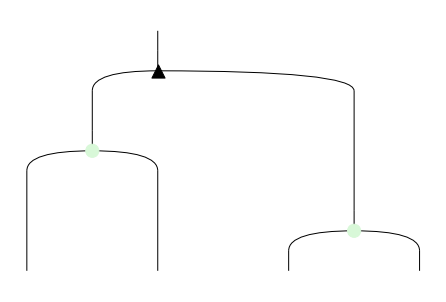

In [24]:
s = W() >> Z(1, 2) @ Z(1, 2)
s.draw()

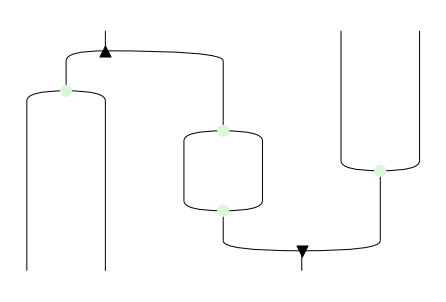

In [25]:
ss = s @ Id(2) >> Id(2) @ s.dagger()
ss.draw()

In [26]:
eval(ss).astype(float)

/tmp/ipykernel_8397/3451086687.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(ss).astype(float)


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

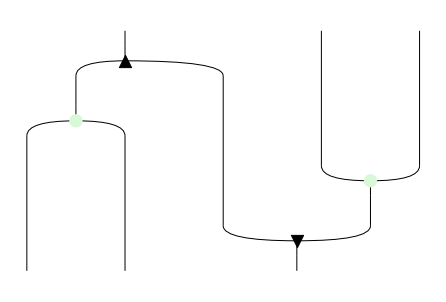

True

In [27]:
ss2 = W(2) @ Z(2, 1) >> Z(1, 2) @ W(2, False)
ss2.normal_form().draw()
eq(ss, ss2)

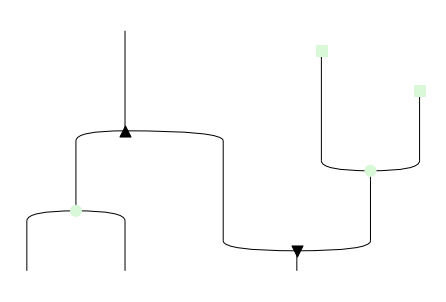

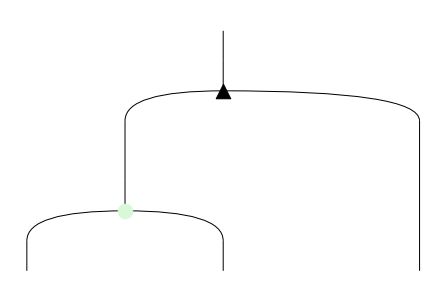

True

In [28]:
t = Id(1) @ boxes([0, 0]) >> ss2
t.draw()
t2 = W() >> Z(1, 2) @ Id(1)
t2.draw()
eq(t, t2)

In [30]:
from spiders import ZBox

In [31]:
a = 5

eval(ZBox(0, 1, a) >> W()) #0->00, +->00 + 10 + 01, - -> 00 - 01 - 10, ... a -> 00 + a01 + a10


array([[1.+0.j],
       [5.+0.j],
       [5.+0.j],
       [0.+0.j]])

In [32]:
a = 2
eq(ZBox(1, 1, a) >> W(), W() >> ZBox(1, 1, a) @ ZBox(1, 1, a)) # Zboxes copy through W's

True

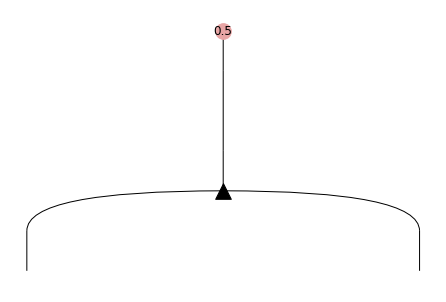

array([[0.+0.j],
       [1.+0.j],
       [1.+0.j],
       [0.+0.j]])

In [34]:
Wstate = X(0, 1, 1/2) >> W()
Wstate.draw()
eval(Wstate)